Розбивка за віком та статтю
Age_group  Gender
 <18       0         5741625
           1          274490
18-24      0          557401
           1          619194
25-34      0          792376
           1          881274
35-44      0          966662
           1         1077951
45-54      0          881500
           1          977987
55-64      0          615313
           1          683990
65+        0          535315
           1          300787
Name: Age, dtype: int64
діаграма - кількість показів та показник переходів 
  Age_group  Impressions       CAT
0       <18     30089822  2.846996
1     18-24      5881141  1.106214
2     25-34      8365147  1.001668
3     35-44     10218789  1.001870
4     45-54      9290811  1.005294
5     55-64      6494207  2.001291
6       65+      4182151  3.001231
Мій DataFrame
  Age_group       Age   Gender  Impressions  Clicks  Signed_In    Women  \
0       <18   6141291   274490     30089822  856656     402505  5741625   
1     18-24  24524290   6191

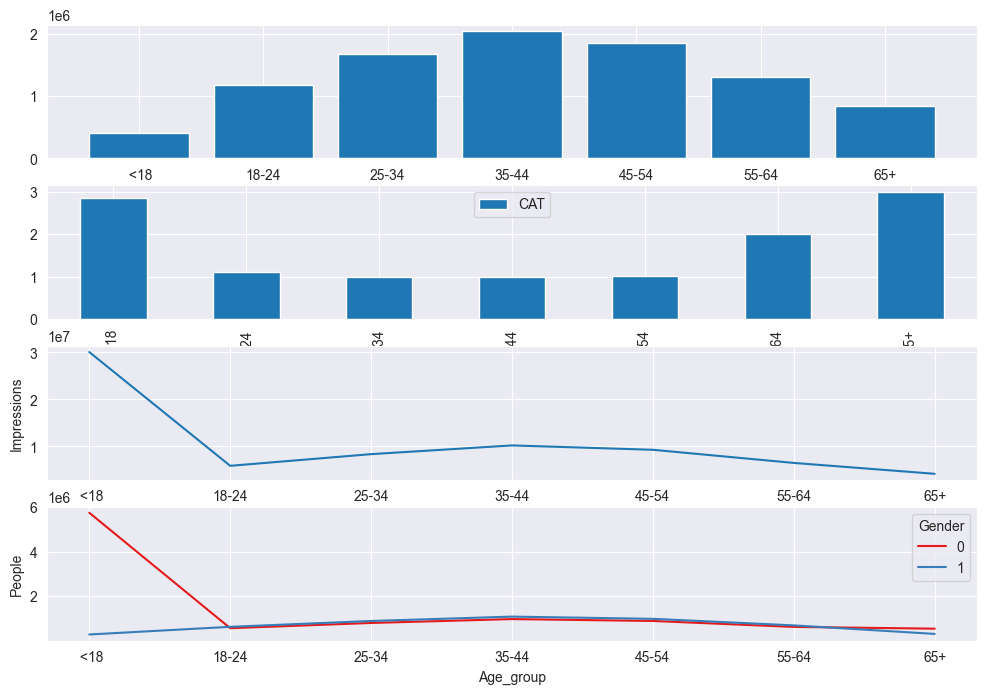

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


i=1
fall=None
while i<=31:
    file_name="./csv/nyt"+str(i)+".csv"
    f1=pd.read_csv(file_name,sep=",")
    f1.count
    f2=pd.concat([fall,f1])
    fall=f2
    f2.count
    i=i+1
fall["Age_group"] = fall["Age"].apply(lambda x:" <18" if x<18 else "18-24"  if x<=24 else "25-34" if x<=34  else "35-44" if x<=44   else "45-54" if x<=54  else "55-64" if x<=64  else "65+")
fall["Women"]=fall["Gender"].apply(lambda x:1-x)
fall["Men"]=fall["Gender"]
fall["People"]=1
print("Розбивка за віком та статтю")
print(fall.groupby(["Age_group","Gender"])["Age"].count())
fall_sum=fall.groupby(["Age_group"], as_index=False).sum()
fall_sum["CAT"]=fall_sum["Clicks"]/fall_sum["Impressions"]*100
diag=fall_sum[["Age_group","Impressions","CAT"]]
print("діаграма - кількість показів та показник переходів ")
print(diag)
print("Мій DataFrame")
print(fall_sum)
fall_gender=fall.groupby(["Age_group","Gender"], as_index=False).sum()

info = fall_gender.iloc[0:20,]
f, (ax1, ax2, ax3,data) = plt.subplots(4, figsize=(12,8))
# matplotlib
ax1.bar(fall_sum.Age_group, fall_sum.Signed_In)
# pandas
fall_sum.plot(x="Age_group", y="CAT", kind="bar", ax=ax2)
# seaborn
#sns.barplot(x=fall_sum.Age_group, y=fall_sum.Impressions, ax=ax3)
sns.lineplot(ax=ax3, x=fall_sum.Age_group, y=fall_sum.Impressions)
sns.lineplot(x = "Age_group", y = "People", data=info, hue="Gender", palette = "Set1")
plt.show()



